# Target  

    This is the stange where we want to freez our architecture and move with introducing some other enhancements, we will start with LR schedulers, the goal is to find the right LR scheduler and boost the accuracy 

# Result 

    we are able to get 99.43% and 99.40% accuracy in last two epochs, since we were playing with learning rate, making dropout as 0 helped us to train the model, all though the model is slightly overfitting we but it is meeting our goal properly, also this is the step where we have achived our assignment goal as well 
    test_accuracy -> 99.43%
    train_accuracy -> 99.7%
    parameters -> 7,824

# Ananlysis  

    1. Introducing LR scheduler helps model to learn on different learning rates , thus better accuracy, 

    2. Choosing the right LR scheduler is also a important task, since we introduce lot of things in our network we need to find the optimal LR scheduler for the job

    3. In the current code we are using StepLR where we try to play with the accuracy after 6th epoch, how we came on this conclusion is simple, once we run this code without the LR scheduler we can see The moment we reach 6th epoch the model performs inconsistently, but the moement we introduce the StepLR, we see the learning is consistent 
                
    4. Chossing the gamma value is mostly hit and trial, 0.1 and 0.2 were introducing a very little change which was able to give us the success but 0.3 was up to the mark
        

CODE BLOCK: 1

In [1]:
# Initialized Logger
import torch
import torch.optim as optim
from torchvision import datasets
from torchsummary import summary
from model import Net
from utils import data_transformation,get_device, \
                  fit_model, plot_accuracy_report, \
                  show_random_results, plot_misclassified, \
                  calculate_accuracy_per_class

CODE BLOCK: 2

In [2]:
# CUDA?
device = get_device()
print("Available Device :: ", device)

INFO:utils:device: cuda


Available Device ::  cuda


CODE BLOCK: 3

In [3]:
transformation_matrix = {
                         "mean_of_data":(0.1307,),
                         "std_of_data": (0.3081,)
                         }

dataloader_kwargs = {'batch_size': 64, 'shuffle': True, 'num_workers': 1, 'pin_memory': True}


train_transforms, test_transforms = data_transformation(transformation_matrix)
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

train_loader = torch.utils.data.DataLoader(train_data, **dataloader_kwargs)
test_loader = torch.utils.data.DataLoader(test_data, **dataloader_kwargs)

INFO:utils:transformation Details ::: 


100%|██████████| 9912422/9912422 [00:00<00:00, 85743977.39it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 117607469.73it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 25222069.28it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 19721044.27it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



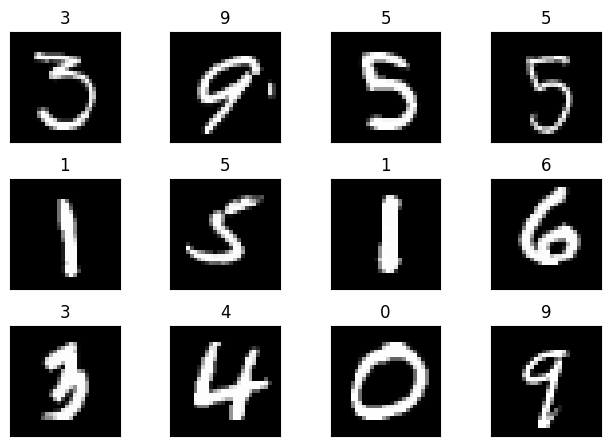

In [4]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

In [5]:
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 26, 26]              36
              ReLU-2            [-1, 4, 26, 26]               0
       BatchNorm2d-3            [-1, 4, 26, 26]               8
           Dropout-4            [-1, 4, 26, 26]               0
            Conv2d-5           [-1, 10, 24, 24]             360
              ReLU-6           [-1, 10, 24, 24]               0
       BatchNorm2d-7           [-1, 10, 24, 24]              20
           Dropout-8           [-1, 10, 24, 24]               0
         MaxPool2d-9           [-1, 10, 12, 12]               0
           Conv2d-10            [-1, 8, 12, 12]              80
             ReLU-11            [-1, 8, 12, 12]               0
      BatchNorm2d-12            [-1, 8, 12, 12]              16
          Dropout-13            [-1, 8, 12, 12]               0
           Conv2d-14            [-1, 4,

In [6]:
training_parameters = {"learning_rate":0.01,
                       "momentum":0.9,
                       "step_size":6,
                       "gamma":0.3,
                       "max_lr":0.017,
                       "num_epochs":15
                       }
train_losses, test_losses, train_acc, test_acc = fit_model(model,training_parameters,train_loader,test_loader,device)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.0124 Batch_id=937 Accuracy=93.13: 100%|██████████| 938/938 [00:24<00:00, 38.14it/s]


Test set: Average loss: 0.0668, Accuracy: 9808/10000 (98.08%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.0501 Batch_id=937 Accuracy=98.25: 100%|██████████| 938/938 [00:25<00:00, 37.48it/s]


Test set: Average loss: 0.0473, Accuracy: 9860/10000 (98.60%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0274 Batch_id=937 Accuracy=98.65: 100%|██████████| 938/938 [00:25<00:00, 37.01it/s]


Test set: Average loss: 0.0361, Accuracy: 9887/10000 (98.87%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0060 Batch_id=937 Accuracy=98.87: 100%|██████████| 938/938 [00:24<00:00, 38.39it/s]


Test set: Average loss: 0.0323, Accuracy: 9898/10000 (98.98%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0926 Batch_id=937 Accuracy=98.99: 100%|██████████| 938/938 [00:24<00:00, 38.91it/s]


Test set: Average loss: 0.0283, Accuracy: 9905/10000 (99.05%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0407 Batch_id=937 Accuracy=99.08: 100%|██████████| 938/938 [00:23<00:00, 39.42it/s]


Test set: Average loss: 0.0244, Accuracy: 9926/10000 (99.26%)

Adjusting learning rate of group 0 to 3.0000e-03.
Epoch 7


Train: Loss=0.0193 Batch_id=937 Accuracy=99.44: 100%|██████████| 938/938 [00:24<00:00, 38.46it/s]


Test set: Average loss: 0.0189, Accuracy: 9935/10000 (99.35%)

Adjusting learning rate of group 0 to 3.0000e-03.
Epoch 8


Train: Loss=0.0018 Batch_id=937 Accuracy=99.47: 100%|██████████| 938/938 [00:23<00:00, 39.17it/s]


Test set: Average loss: 0.0196, Accuracy: 9936/10000 (99.36%)

Adjusting learning rate of group 0 to 3.0000e-03.
Epoch 9


Train: Loss=0.0084 Batch_id=937 Accuracy=99.53: 100%|██████████| 938/938 [00:23<00:00, 39.21it/s]


Test set: Average loss: 0.0199, Accuracy: 9930/10000 (99.30%)

Adjusting learning rate of group 0 to 3.0000e-03.
Epoch 10


Train: Loss=0.0033 Batch_id=937 Accuracy=99.55: 100%|██████████| 938/938 [00:23<00:00, 39.10it/s]


Test set: Average loss: 0.0205, Accuracy: 9933/10000 (99.33%)

Adjusting learning rate of group 0 to 3.0000e-03.
Epoch 11


Train: Loss=0.0163 Batch_id=937 Accuracy=99.58: 100%|██████████| 938/938 [00:23<00:00, 39.32it/s]


Test set: Average loss: 0.0208, Accuracy: 9936/10000 (99.36%)

Adjusting learning rate of group 0 to 3.0000e-03.
Epoch 12


Train: Loss=0.0327 Batch_id=937 Accuracy=99.58: 100%|██████████| 938/938 [00:24<00:00, 38.77it/s]


Test set: Average loss: 0.0190, Accuracy: 9939/10000 (99.39%)

Adjusting learning rate of group 0 to 9.0000e-04.
Epoch 13


Train: Loss=0.0026 Batch_id=937 Accuracy=99.67: 100%|██████████| 938/938 [00:23<00:00, 39.14it/s]


Test set: Average loss: 0.0192, Accuracy: 9932/10000 (99.32%)

Adjusting learning rate of group 0 to 9.0000e-04.
Epoch 14


Train: Loss=0.0225 Batch_id=937 Accuracy=99.71: 100%|██████████| 938/938 [00:24<00:00, 38.78it/s]


Test set: Average loss: 0.0187, Accuracy: 9943/10000 (99.43%)

Adjusting learning rate of group 0 to 9.0000e-04.
Epoch 15


Train: Loss=0.0200 Batch_id=937 Accuracy=99.70: 100%|██████████| 938/938 [00:24<00:00, 38.84it/s]


Test set: Average loss: 0.0188, Accuracy: 9940/10000 (99.40%)

Adjusting learning rate of group 0 to 9.0000e-04.


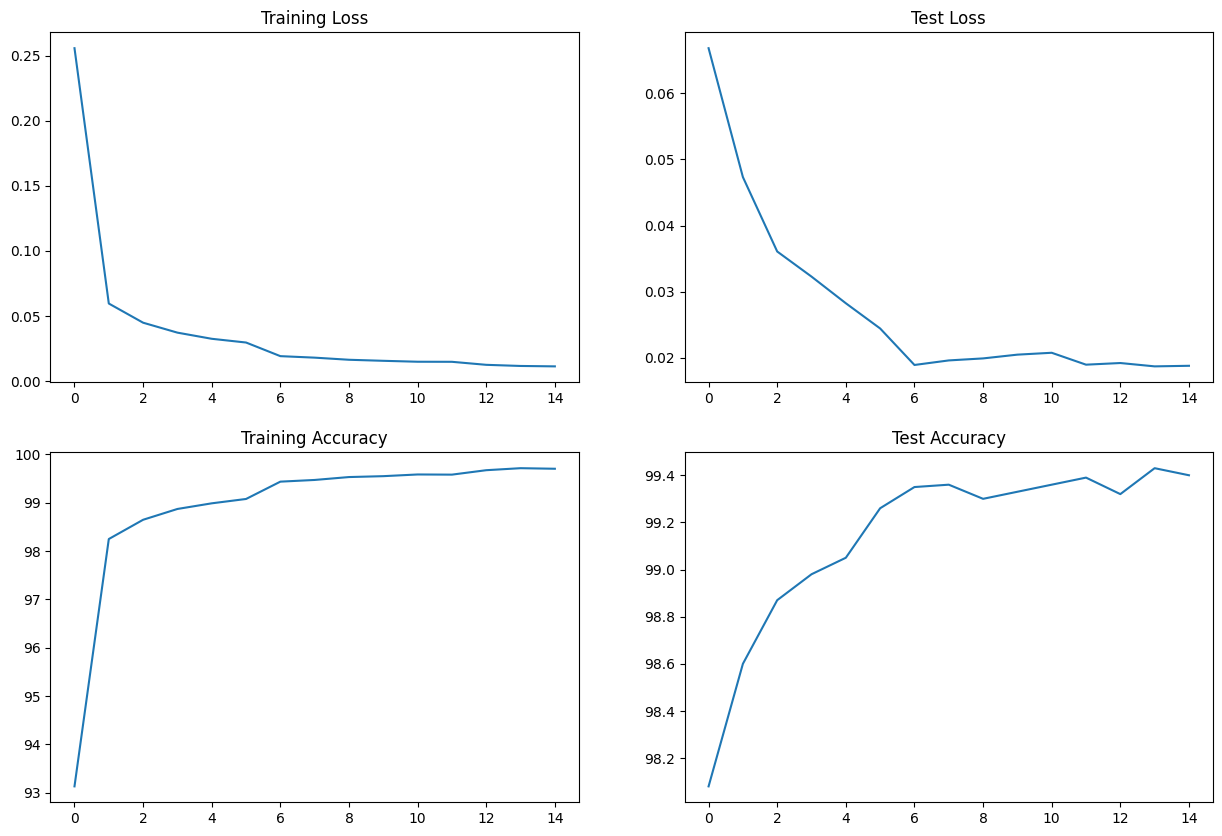

In [7]:
plot_accuracy_report(train_losses, test_losses, train_acc, test_acc)

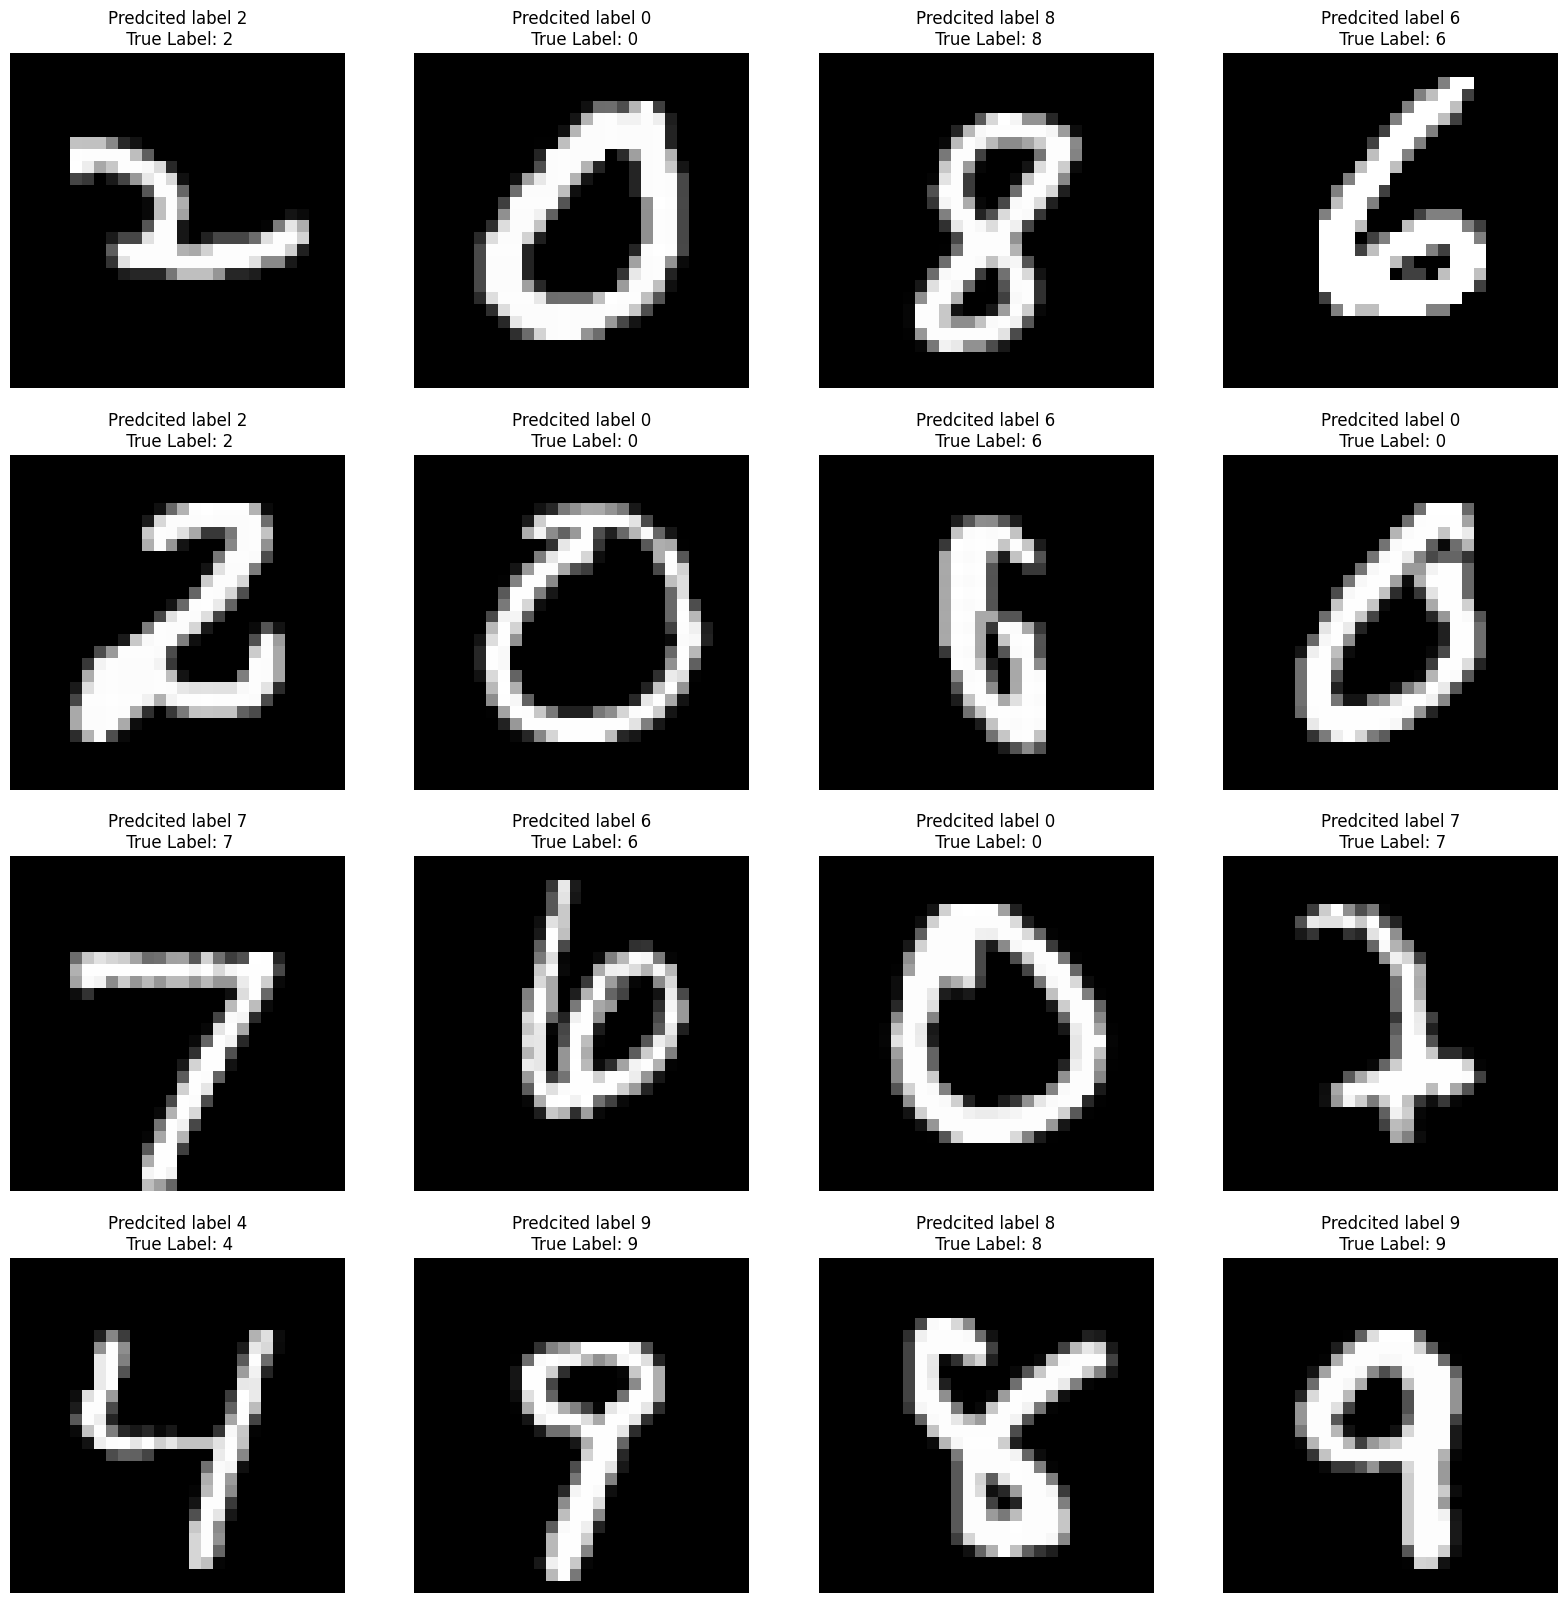

In [8]:
grid_size = (4,4)
show_random_results(test_loader,grid_size,model,device)

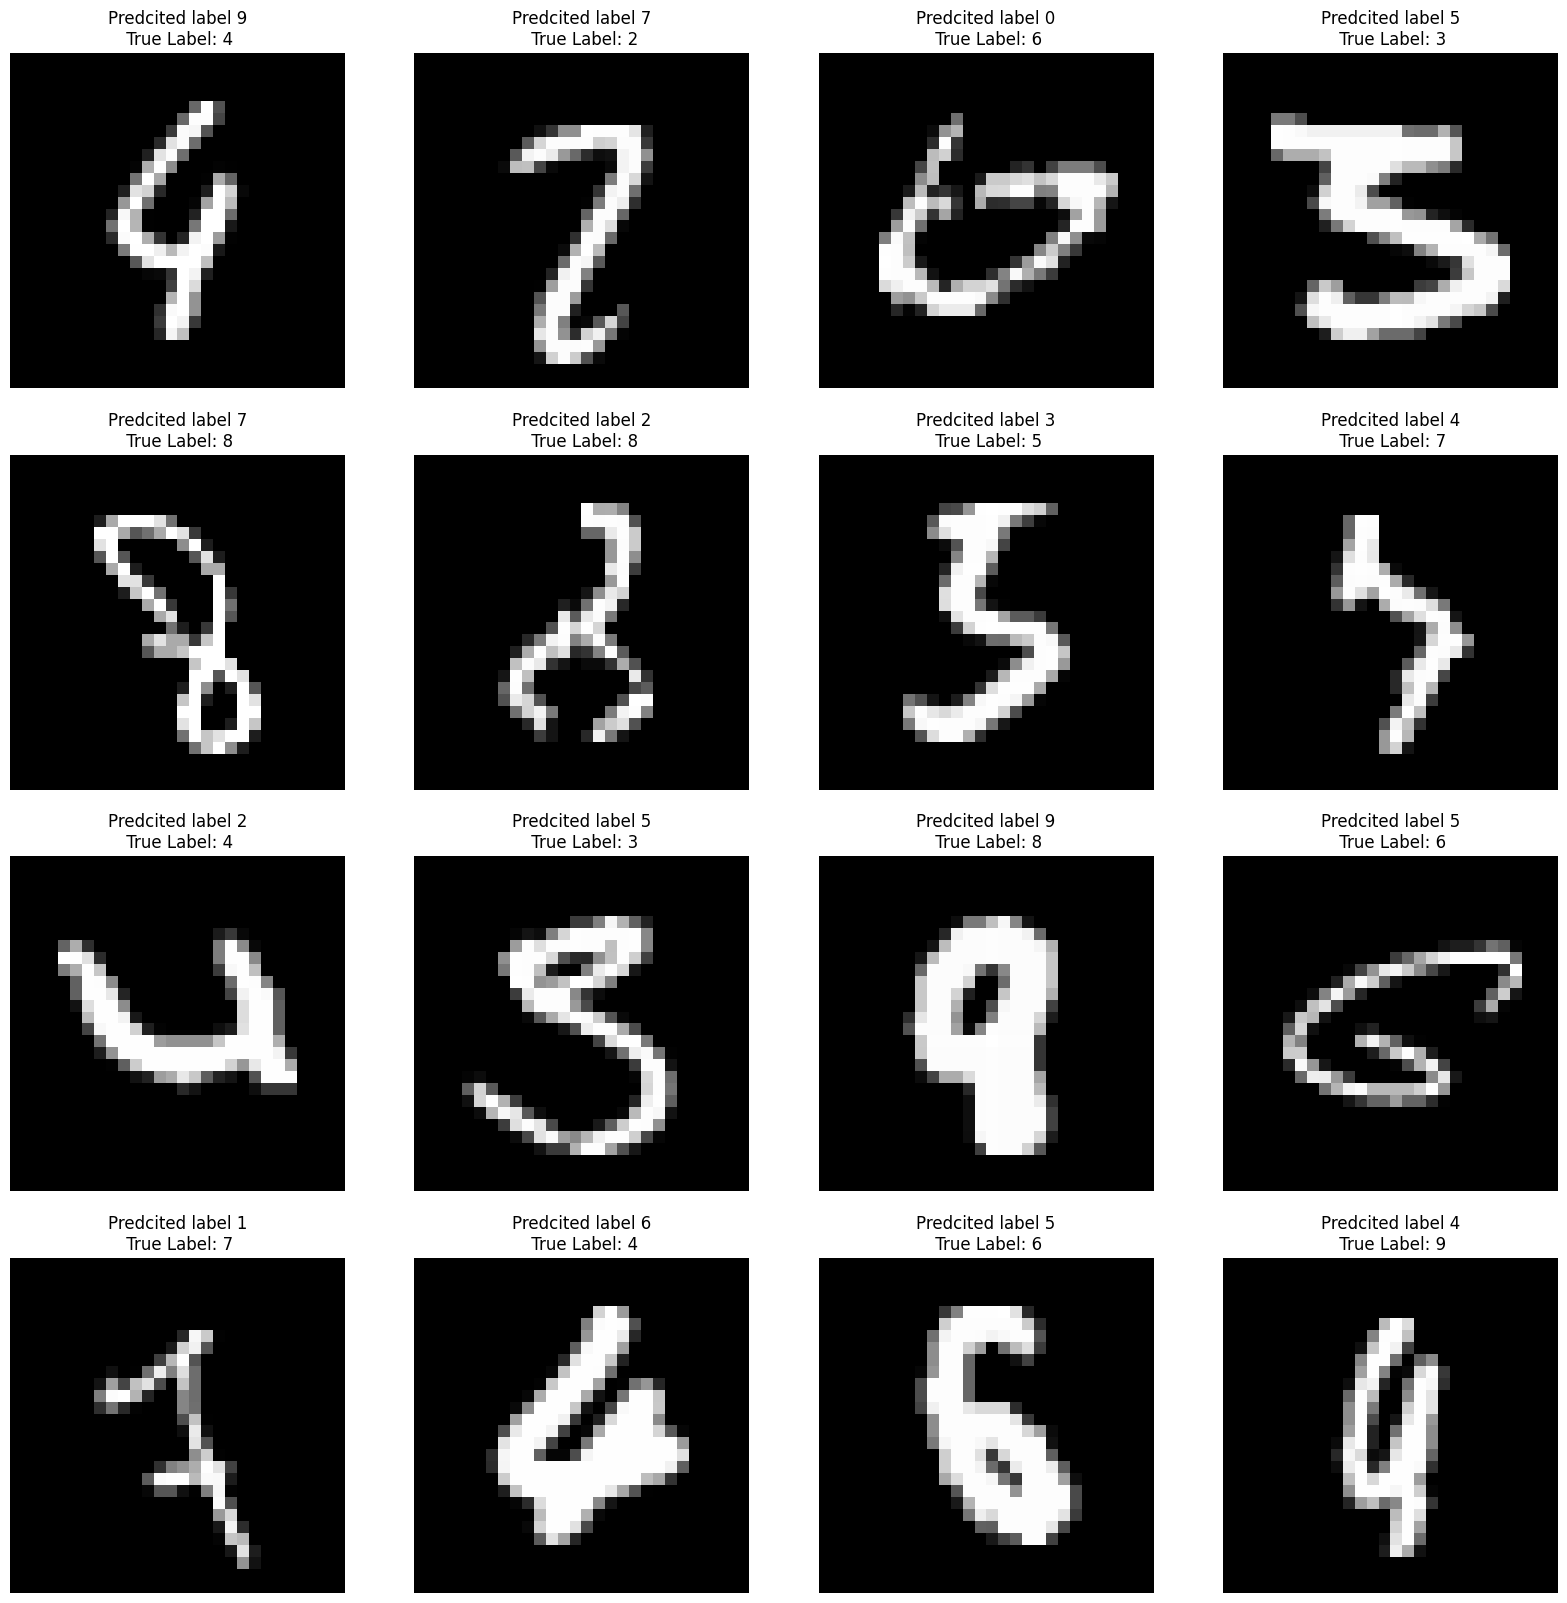

In [9]:
grid_size = (4,4)
plot_misclassified(model,grid_size,test_loader,device)

Accuracy of 0 - zero : 99 %
Accuracy of 1 - one : 100 %
Accuracy of 2 - two : 100 %
Accuracy of 3 - three : 98 %
Accuracy of 4 - four : 98 %
Accuracy of 5 - five : 97 %
Accuracy of 6 - six : 100 %
Accuracy of 7 - seven : 98 %
Accuracy of 8 - eight : 99 %
Accuracy of 9 - nine : 98 %


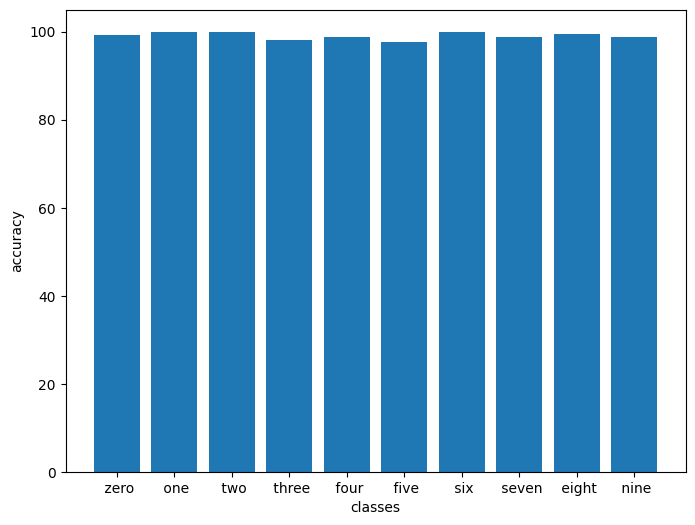

In [10]:
calculate_accuracy_per_class(model,device,test_loader,test_data)